# A simple example of clustering using KMeans

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
data = pd.read_excel("closest_stars.xlsx", index_col="star")
data.head()

,mag_app,mag_abs,dist,class
star,,,,
﻿10 Tauri,4.29,3.60,44.7,F
107 Piscium,5.24,5.87,24.4,K
11 Leonis Minoris A,5.40,5.16,36.5,G
111 Tauri,5.00,4.17,47.8,F
12 Ophiuchi,5.77,5.82,31.9,K


Text(0, 0.5, 'Abs. Magnitude')

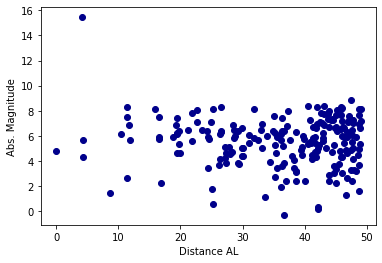

In [3]:
plt.scatter(data.dist, data.mag_abs, color="darkblue")
plt.xlabel("Distance AL")
plt.ylabel("Abs. Magnitude")

In [4]:
abs_magnitude = data.mag_abs.values.reshape(-1,1)

C:\Users\david\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Inertia')

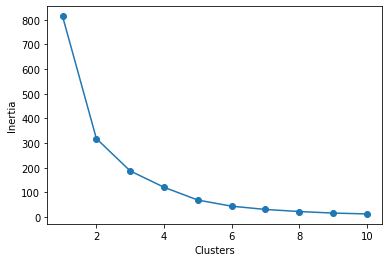

In [5]:
clusters = []
inertia = []
for x in range(1, 11):
    model = KMeans(n_clusters = x)
    model.fit(abs_magnitude)
    clusters.append(x)
    inertia.append(model.inertia_)
    
plt.plot(clusters, inertia, marker="o")
plt.xlabel("Clusters")
plt.ylabel("Inertia")

In [6]:
model = KMeans(n_clusters = 3)
model.fit(abs_magnitude)
labels = model.predict(abs_magnitude)

[Text(0.5, 0, 'Distance AL'), Text(0, 0.5, 'Abs. Magnitude')]

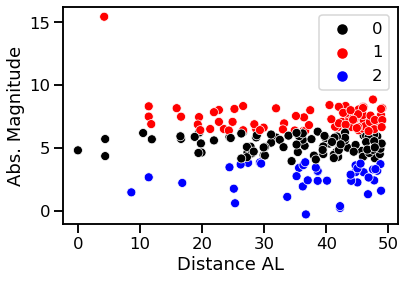

In [7]:
sns.set_context("talk")
palette = ["black", "red", "blue"]
sns.scatterplot(x = "dist", y="mag_abs", data=data, hue=labels, palette=palette).set(xlabel = "Distance AL",
                                                                                    ylabel = "Abs. Magnitude")

In [8]:
labels = np.where(labels == 0, "bright", np.where(labels == 1, "not bright", "very bright"))

[Text(0.5, 0, 'Distance AL'), Text(0, 0.5, 'Abs. Magnitude')]

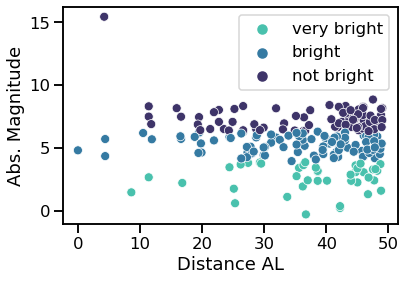

In [9]:
sns.scatterplot(x = "dist", y="mag_abs", data=data, hue=labels, palette="mako_r").set(xlabel = "Distance AL",
                                                                                    ylabel = "Abs. Magnitude")

In [10]:
df = pd.DataFrame({"labels" : labels, "class" : data["class"]})
pd.crosstab(df.labels, df["class"])

class,A,F,G,K,M
labels,,,,,
bright,0,8,52,31,0
not bright,0,0,1,77,2
very bright,9,21,6,5,0
